# Heart Attack Analysis & Prediction Dataset

<img src="hearattack.png">

📍 A dataset for heart attack classification


### ℹ About the Heart Attack dataset
- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type:

    💉 Value 1: typical angina

    💉 Value 2: atypical angina

    💉 Value 3: non-anginal pain

    💉 Value 4: asymptomatic

    💉 trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results:

    💉 Value 0: normal

    💉 Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    💉 Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- target : 0= less chance of heart attack 1= more chance of heart attack

### Ⓜ Models:
- DecisionTreeClassifier
- GradientBoostingClassifier
- RandomForestClassifier
- SVC

### Metrics:

📏 Accuracy Score: accuracy_score()

📏 Receiver operating characteristic (ROC): roc_curve()

### Charts:

📈 Box Plot

📈 line chart for plotting roc curve

### Workflow:
🖍 Using KNIME

🖍 About KNIME: Free and open source with all your data analysis tools. Create data science solutions with the visual workflow builder.

<img src="workflow.png">

#### The Scores for the models using knime:


<table>
  <thead>
    <tr>
      <th>Classifier Name</th>
      <th>Accuracy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Gradient Boosted Trees Learner</td>
      <td>73.8%</td>
    </tr>
    <tr>
      <td>SVM Learner</td>
      <td>78.7%</td>
    </tr>
    <tr>
      <td>Random Forest Learner</td>
      <td>77.0%</td>
    </tr>
    <tr>
      <td>Tree Ensamble Learner</td>
      <td>73.8%</td>
    </tr>
  </tbody>
</table>

##### The best classifier which must be used in knime to make prediction is SVM Learner Classifier.

# Let Us Get Started

In [1]:
# Importing pandas for manipulating the data
import pandas as pd

In [2]:
# Reading the CSV file
df = pd.read_csv("heart.csv")

In [3]:
# Showing first 5 rows
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
f"The Shape of the data: {df.shape}"

'The Shape of the data: (303, 14)'

In [5]:
# Summary of the data
df.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# No.Missing values
noMissing = df.isnull().sum().sum()
if noMissing:
    print("There are no missing values")
else:
    print(F"There is/are {noMissing} missing value/s")

There is/are 0 missing value/s


In [7]:
# Summation of the duplicated values
df.duplicated().sum().sum()

1

In [8]:
# Dropping the duplicated values
df.drop_duplicates(inplace=True)

In [9]:
# Check duplicated values
df.duplicated().sum().sum()

0

In [10]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

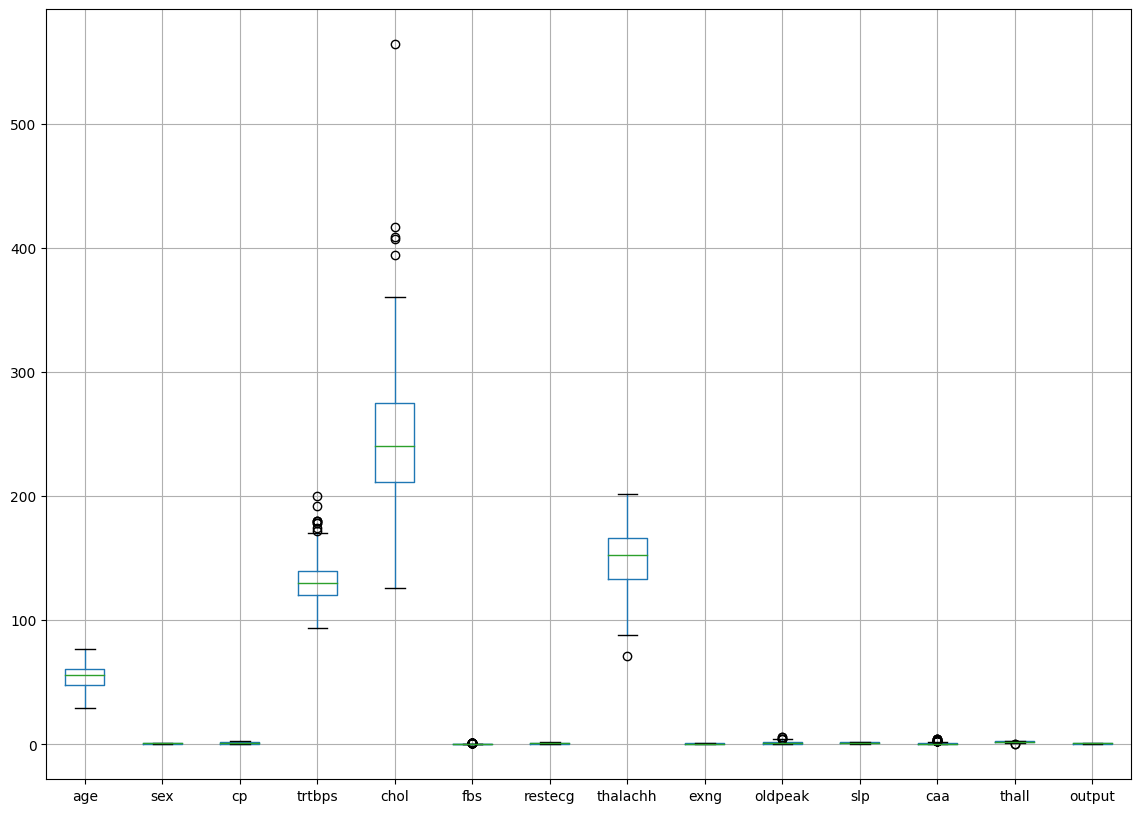

In [11]:
# Show a box plot so we know if tere are outliers or no
df.boxplot(figsize=(14, 10))
plt.show()

### Clearing Outliers

In [12]:
# Build a function for clearing outliers
def  clear_outliers(data):
    import numpy as np
    df_cp = data.copy()
    cols = df_cp.columns
    for col in cols:
        Q1 = np.nanpercentile(df_cp[col], 25)
        Q3 = np.nanpercentile(df_cp[col], 75)
        IQR = Q3 - Q1
        a = Q1 - IQR * 1.5 # LOWER BOUND
        b = Q3 + IQR * 1.5 # UPPER BOUND
        # Replace the data with mean or any value that you want to use
        df_cp[col] = np.where(df_cp[col] < a, a, df_cp[col])
        df_cp[col] = np.where(df_cp[col] > b, b, df_cp[col])
        
    return df_cp


In [13]:
# Create a new dataframe after the dataset cleared from outliers
dff = clear_outliers(df)

In [14]:
# Show first 5 rows
dff.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63.0,1.0,3.0,145.0,233.0,0.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


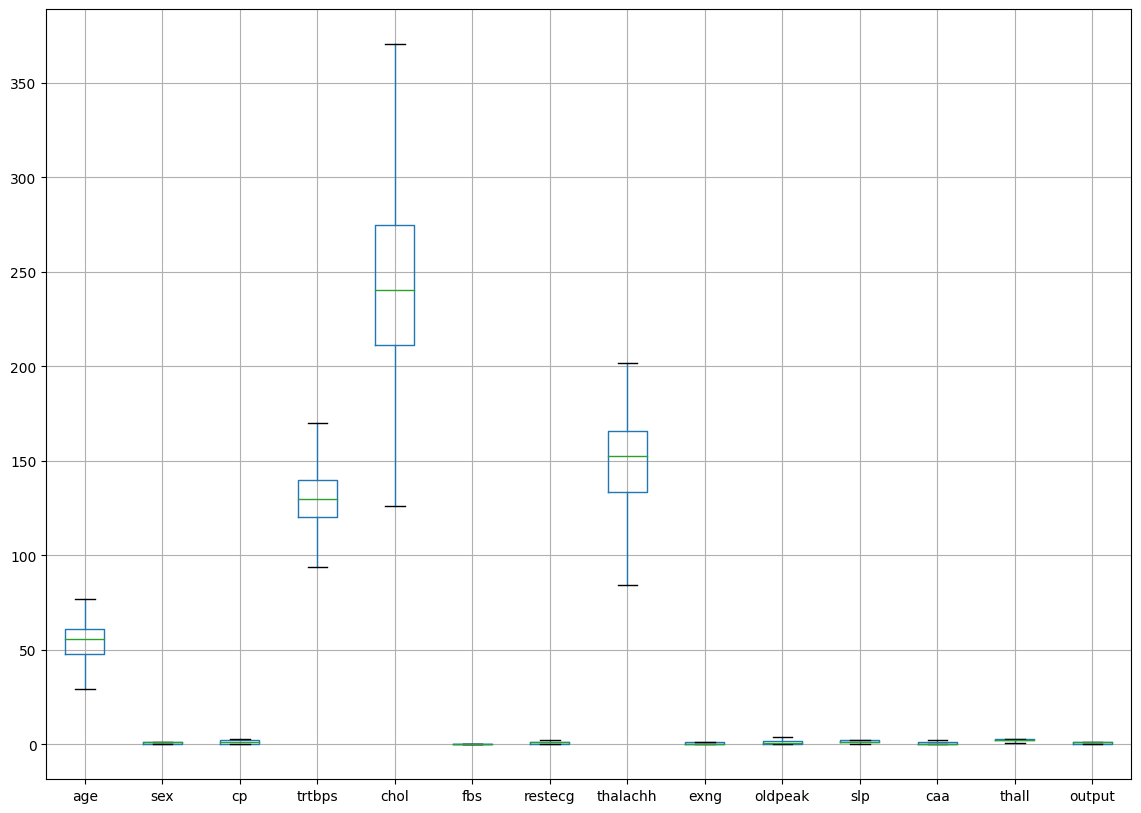

In [15]:
# Show the boxplot after got rid of outliers 
dff.boxplot(figsize=(14, 10))
plt.show()

# Training and Testing Models

### Creating Four Models Then Testing Them and Showing Their Accuracy Score

- Decision Tree Classifier
- SVM Model | SVC -> Support Vector Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

<h6>All of the above classifiers are used to classify the data into groups, in this project we will use them to do the binary classification task which means that we want the model predict if something is True or False.</h6>

### Steps:

1. Call "import" the needed libraries.
2. Call the classifiers.
3. Prepare and Splitting the Data.
4. Initialize the Classifiers.
5. Fitting the Classifiers.
6. Predicting.
7. Compute the Accuracy for each Classifier
8. Plotting the Roc-Curve to Show the Models Performance

In [16]:
# Dependencies

# import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# import Gradient Boosting Classifier and Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# import Support Vector Classifier
from sklearn.svm import SVC
# train_test_split used to split the data 
from sklearn.model_selection import train_test_split
# accuracy_score used to calculate the accuracy of the classifier
from sklearn.metrics import accuracy_score
# Importing the roc curve
from sklearn.metrics import roc_curve
# importing seaborn and matplotlib library for visualizing task
import seaborn as sea
import matplotlib.pyplot as plt

In [17]:
# X -> All features without the target variable
# y -> Only the Target Variable
X = dff.drop(columns=["output"])
y = dff['output']

In [18]:
# Sokitting the data into 80% for training and 20% for testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [19]:
# Putting all classifiers inside a dictionary
classifiers = dict(
    tree = DecisionTreeClassifier(),
    gradient = GradientBoostingClassifier(),
    random = RandomForestClassifier(),
    svc = SVC()
)

In [20]:
# Loopinng through the dictionary then fit each classifier and store its accuracy inside the acc_list
acc_list = []
for classifier in classifiers.values():
    # prepare the classifier
    clr = classifier
    # Fit the classifier
    clr.fit(X_train, y_train)
    # make predictions
    pred = clr.predict(X_test)
    # Compute the accuracy
    acc = accuracy_score(y_test, pred)
    # Append the accuracy and name of classifier into the acc_list
    acc_list.append((f"{classifier}".removesuffix("()"), acc))

In [21]:
# Show the acc_list
acc_list

[('DecisionTreeClassifier', 0.8032786885245902),
 ('GradientBoostingClassifier', 0.8360655737704918),
 ('RandomForestClassifier', 0.8852459016393442),
 ('SVC', 0.6721311475409836)]

In [22]:
# Convert the acc_list to dataframe
df_acc = pd.DataFrame(acc_list, columns=["classifier", "accuracy"])

In [23]:
df_acc

,classifier,accuracy
0,DecisionTreeClassifier,0.803279
1,GradientBoostingClassifier,0.836066
2,RandomForestClassifier,0.885246
3,SVC,0.672131


In [24]:
# Classifers items
classifiers.items()

dict_items([('tree', DecisionTreeClassifier()), ('gradient', GradientBoostingClassifier()), ('random', RandomForestClassifier()), ('svc', SVC())])

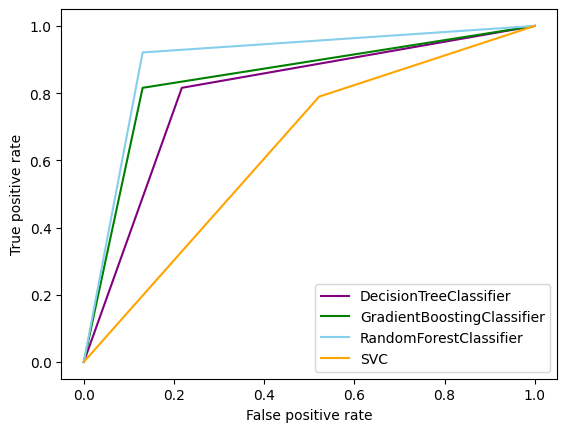

In [25]:
i = 0
for name_model, model in classifiers.items():
    # fit the model --> train the model --> fit(feature_train "X_train", label_train "y_train")
    model = model.fit(X_train, y_train)
    # make prediction for features_test "X_test"
    y_predictied = model.predict(X_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predictied[::1])

    # now let us visualize fpr, tpr using plot line
    colors = ('purple', 'green', 'skyblue', 'orange')
    plt.plot(false_positive_rate, true_positive_rate, c=colors[i])
    i += 1
    
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['DecisionTreeClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier', 'SVC'])
plt.show()

##### The best performance is for Random Forest Classifier, so you can use it for predicting Unseen data

<h1 style="text-align:center;">End of The Project